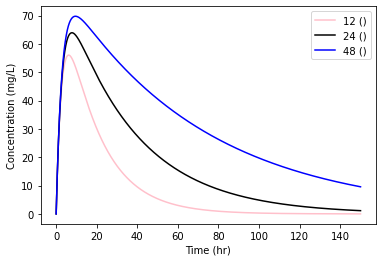

In [19]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import math


# Define the parameters


V_C = 5  # L

V_A = 0 #
V_Apatch = 1 # L

V_GI = 0.1 #L

k_a = 0 #  /hr
k_gi = 0.35  # /hr
k_a_inf = 0 # /hr
k_a_patch = 0.0044 # /hr

k_ec12 = 0.693/ 12 # /hr
k_ec24 = 0.693 / 24 # /hr
k_ec48 = 0.693 / 48 # /hr

dose = 400  # mg
F_GI = 1
F_patch = 0.7

# Initial concentrations (mg/L)
#C_A0 = dose / V_A  # The initial condition for the absorption compartment is the dose divided by V_A
C_A0 = 0
C_GI = F_GI * dose / V_GI
C_C0inj = dose / V_C
C_C0 = 0 #

C_A_patch0 = 1200 # mL/L

initial_conditions = [C_A0, C_GI, C_C0]  # C_A, C_GI, C_C

# Time vector (24 hrs)
t = np.linspace(0, 300, 12000)

# Making ODEs for pill administration
def model12(t, y):
    C_A, C_GI, C_C = y
    dC_A_dt = -k_a * C_A
    dC_GI_dt = k_a * C_A * V_A/V_GI - k_gi * C_GI

    dC_C_dt =  -k_ec12 * C_C + k_gi * C_GI * (V_GI/V_C)
 

    return [dC_A_dt, dC_GI_dt, dC_C_dt]

def model24(t, y):
    C_A, C_GI, C_C = y
    dC_A_dt = -k_a * C_A
    dC_GI_dt = k_a * C_A * V_A/V_GI - k_gi * C_GI

    dC_C_dt = - k_ec24 * C_C + k_gi * C_GI * (V_GI/V_C)
 

    return [dC_A_dt, dC_GI_dt, dC_C_dt]

def model48(t, y):
    C_A, C_GI, C_C = y
    dC_A_dt = -k_a * C_A
    dC_GI_dt = k_a * C_A * V_A/V_GI - k_gi * C_GI

    dC_C_dt = - k_ec48 * C_C + k_gi * C_GI * (V_GI/V_C)
 

    return [dC_A_dt, dC_GI_dt, dC_C_dt]


#Making ODEs for injections
def inj12(t, y)
    C_A, C_GI, C_C = y
    dC_A_dt = 0
    dC_GI_dt = 0 #
    dC_C_dt = - k_ec12 * C_C
    return [dC_A_dt, dC_GI_dt, dC_C_dt]

def inj24(t, y)
    C_A, C_GI, C_C = y
    dC_A_dt = 0
    dC_GI_dt = 0 #
    dC_C_dt = - k_ec24 * C_C
    return [dC_A_dt, dC_GI_dt, dC_C_dt]

def inj48(t, y)
    C_A, C_GI, C_C = y
    dC_A_dt = 0
    dC_GI_dt = 0 #
    dC_C_dt = - k_ec48 * C_C
    return [dC_A_dt, dC_GI_dt, dC_C_dt]


#Making ODEs for patches
def patch12(t, y):
    C_A, C_GI, C_C = y
    dC_A_dt = - k_a * C_A
    dC_GI_dt = 0 #
    dC_C_dt = - k_ec12 * C_C + C_A * V_Apatch / V_C
    return [dC_A_dt, dC_GI_dt, dC_C_dt]
    
def patch24(t, y):
    C_A, C_GI, C_C = y
    dC_A_dt = - k_a * C_A
    dC_GI_dt = 0 #
    dC_C_dt = - k_ec24 * C_C + C_A * V_Apatch / V_C
    return [dC_A_dt, dC_GI_dt, dC_C_dt]

def patch48(t, y):
    C_A, C_GI, C_C = y
    dC_A_dt = - k_a * C_A
    dC_GI_dt = 0 #
    dC_C_dt = - k_ec48 * C_C + C_A * V_Apatch / V_C
    return [dC_A_dt, dC_GI_dt, dC_C_dt]


#Making ODEs for infusions
def inf12(t, y)
    C_A, C_GI, C_C = y
    dC_A_dt = 0
    dC_GI_dt = 0 #
    dC_C_dt = - k_ec12 * C_C + 700 / (7 / 24)
    return [dC_A_dt, dC_GI_dt, dC_C_dt]

def inf24(t, y)
    C_A, C_GI, C_C = y
    dC_A_dt = 0
    dC_GI_dt = 0 #
    dC_C_dt = - k_ec24 * C_C + 700 / (7 / 24)
    return [dC_A_dt, dC_GI_dt, dC_C_dt]

def inf48(t, y)
    C_A, C_GI, C_C = y
    dC_A_dt = 0
    dC_GI_dt = 0 #
    dC_C_dt = - k_ec48 * C_C + 700 / (7 / 24)
    return [dC_A_dt, dC_GI_dt, dC_C_dt]

    
# Solve ODE
solution12 = solve_ivp(model12, [t[0], t[-1]], initial_conditions, t_eval=t)
min_concentration = 1e-6
solution12.y = np.maximum(solution12.y, min_concentration)  # Set any negative concentrations to 0

solution24 = solve_ivp(model24, [t[0], t[-1]], initial_conditions, t_eval=t)
min_concentration = 1e-6
solution24.y = np.maximum(solution24.y, min_concentration)  # Set any negative concentrations to 0

solution48 = solve_ivp(model48, [t[0], t[-1]], initial_conditions, t_eval=t)
min_concentration = 1e-6
solution48.y = np.maximum(solution48.y, min_concentration)  # Set any negative concentrations to 0


#inj ODEs for all half lives
sol_inj12 = solve_ivp(inj12, [t[0], t[-1]], [0, 1200, 0], t_eval=t)
min_concentration = 1e-6
sol_inj12.y = np.maximum(sol_inj12.y, min_concentration)  # Set any negative concentrations to 0

sol_inj24 = solve_ivp(inj24, [t[0], t[-1]], [0, 1200, 0], t_eval=t)
min_concentration = 1e-6
sol_inj24.y = np.maximum(sol_inj24.y, min_concentration)  # Set any negative concentrations to 0

sol_inf48 = solve_ivp(inf48, [t[0], t[-1]], [0, 1200, 0], t_eval=t)
min_concentration = 1e-6
sol_inj48.y = np.maximum(sol_inj48.y, min_concentration)  # Set any negative concentrations to 0


#patch ODEs for all half lives
sol_patch12 = solve_ivp(patch12, [t[0], t[-1]], [0, 1200, 0], t_eval=t)
min_concentration = 1e-6
sol_patch12.y = np.maximum(sol_patch12.y, min_concentration)  # Set any negative concentrations to 0

sol_patch24 = solve_ivp(patch24, [t[0], t[-1]], [0, 1200, 0], t_eval=t)
min_concentration = 1e-6
sol_patch24.y = np.maximum(sol_patch24.y, min_concentration)  # Set any negative concentrations to 0

sol_patch48 = solve_ivp(patch48, [t[0], t[-1]], [0, 1200, 0], t_eval=t)
min_concentration = 1e-6
sol_patch48.y = np.maximum(sol_patch48.y, min_concentration)  # Set any negative concentrations to 0


#inf ODEs for all half lives
sol_inf12 = solve_ivp(inf12, [t[0], t[-1]], [0, 1200, 0], t_eval=t)
min_concentration = 1e-6
sol_inf12.y = np.maximum(sol_inf12.y, min_concentration)  # Set any negative concentrations to 0

sol_inf24 = solve_ivp(inf24, [t[0], t[-1]], [0, 1200, 0], t_eval=t)
min_concentration = 1e-6
sol_inf24.y = np.maximum(sol_inf24.y, min_concentration)  # Set any negative concentrations to 0

sol_inf48 = solve_ivp(inf48, [t[0], t[-1]], [0, 1200, 0], t_eval=t)
min_concentration = 1e-6
sol_inf48.y = np.maximum(sol_inf48.y, min_concentration)  # Set any negative concentrations to 0


#solution_2 = solve_ivp(model_1c, [t[0], t[-1]], ic1, t_eval=t)

# Plot the results

plt.plot(solution12.t, solution12.y[2], color = 'pink', label='12 ()')
plt.plot(solution24.t, solution24.y[2], color = 'black', label='24 ()')
plt.plot(solution48.t, solution48.y[2], color = 'blue', label='48 ()')

plt.title('')
plt.xlabel('Time (hr)')
plt.ylabel('Concentration (mg/L)')
#plt.yscale('log')
plt.legend()
plt.grid(False)
plt.show()


